In [1]:
from __future__ import annotations
import numpy as np
import dataclasses
import sys

sys.setrecursionlimit(100000)

CONNECTING_TILES = {
    'NORTH': ['|', '7', 'F'],
    'EAST': ['-', '7', 'J'],
    'SOUTH': ['|', 'J', 'L'],
    'WEST': ['-', 'F', 'L']
}

NEXT_DIRECTION = {
    'NORTH' : {
        '|' : 'NORTH',
        '7' : 'WEST',
        'F' : 'EAST'
    },
    'EAST' : {
        '-' : 'EAST',
        '7' : 'SOUTH',
        'J' : 'NORTH'
    },    
    'SOUTH' : {
        '|' : 'SOUTH',
        'J' : 'WEST',
        'L' : 'EAST'
    },
    'WEST' : {
        '-' : 'WEST',
        'F' : 'SOUTH',
        'L' : 'NORTH'
    }
}

@dataclasses.dataclass
class Node:
    x: int
    y: int
    prev: Node = None
    next: Node = None
    next_direction: str = None
    distance: int = 0
    
    def __repr__(self) -> str:
        return f'({self.x}, {self.y}, {self.distance}) -> {self.next_direction}'

    def __eq__(self, other) -> bool:
        return self.x == other.x and self.y == other.y and self.distance == other.distance

class Direction:
    NORTH = ('NORTH', -1, 0)
    SOUTH = ('SOUTH', 1, 0)
    EAST = ('EAST', 0, 1)
    WEST = ('WEST', 0, -1)
    
    def get_direction(dir: str) -> tuple[str, int, int]:
        match dir:
            case 'NORTH':
                return Direction.NORTH
            case 'SOUTH':
                return Direction.SOUTH
            case 'EAST':
                return Direction.EAST
            case 'WEST':
                return Direction.WEST 
    
with open('input.txt') as f:
    lines = f.readlines()

input = [[c for c in line.strip()] for line in lines]  
input  = np.array(input)  

SHAPE = (input.shape[1], input.shape[0])

y, x = np.where(input == 'S')

start = Node(x[0], y[0])
start_cnt = 0
for dir, y_offset, x_offset in (Direction.NORTH, Direction.EAST, Direction.SOUTH, Direction.WEST):
    
    if dir == 'NORTH' and start.y == 0 or \
        dir == 'EAST' and start.x == input.shape[1] - 1 or \
        dir == 'SOUTH' and start.y == input.shape[0] - 1 or \
        dir == 'WEST' and start.x == 0:
            continue
    
    tile = input[start.y + y_offset, start.x + x_offset]
    if tile in CONNECTING_TILES[dir]:
        if start_cnt == 0:
            start.next = Node(
                start.x + x_offset, 
                start.y + y_offset,
                prev=start,
                next_direction=NEXT_DIRECTION[dir][tile],
                distance=1
            )
            start_cnt += 1
        else:
            start.prev = Node(
                start.x + x_offset, 
                start.y + y_offset,
                prev=start,
                next_direction=NEXT_DIRECTION[dir][tile],
                distance=1                
            )
            break

node1 = start.next
node2 = start.prev

print(node1, node2)

while node1 != node2:
    dir,  y_offset, x_offset = Direction.get_direction(node1.next_direction)
    next_char = input[node1.y + y_offset, node1.x + x_offset]
    if next_char in CONNECTING_TILES[dir]:
        node1.next = Node(
            node1.x + x_offset,
            node1.y + y_offset,
            prev=node1,
            next_direction=NEXT_DIRECTION[dir][next_char],
            distance=node1.distance + 1
        )
        node1 = node1.next
    
    else:
        break
    
    dir, y_offset, x_offset = Direction.get_direction(node2.next_direction)
    next_char = input[node2.y + y_offset, node2.x + x_offset]
    if next_char in CONNECTING_TILES[dir]:
        node2.next = Node(
            node2.x + x_offset,
            node2.y + y_offset,
            prev=node2,
            next_direction=NEXT_DIRECTION[dir][next_char],
            distance=node2.distance + 1
        )
        node2 = node2.next
    
    else:
        break    

print(node1.distance)

(44, 92, 1) -> EAST (42, 92, 1) -> SOUTH
7107


In [2]:
node1_o = [(start.x, start.y)]
node2_o = [(start.x, start.y)]
node1 = start.next
node2 = start.prev
lines = []
while node1 is not None and node2 is not None:
    node1_o.append((node1.x, node1.y))
    node2_o.append((node2.x, node2.y))
    node1 = node1.next
    node2 = node2.next

output = node1_o + node2_o

def get_xys_from_char(char: str) -> list[tuple[int, int]]:
    match char:
        case '|':
            return [( 0,-1),( 0, 0),( 0, 1)]
        case '-':
            return [(-1, 0),( 0, 0),( 1, 0)]
        case '7':
            return [(-1, 0),( 0, 0),( 0, 1)]
        case 'F':
            return [( 0, 1),( 0, 0),( 1, 0)]
        case 'J':
            return [( 0,-1),( 0, 0), (-1,0)]
        case 'L':
            return [(0, -1),( 0, 0),( 1, 0)]
        case 'S':
            return get_xys_from_char('-')

In [3]:
import numpy as np
from itertools import product

pipe = {'x': [], 'y': []}

grid = np.zeros((SHAPE[1] * 3, SHAPE[0] * 3))

def flood(x: int, y: int):
    for _, x_offset, y_offset in (Direction.NORTH, Direction.EAST, Direction.SOUTH, Direction.WEST):
        try:
            if(grid[y + y_offset, x + x_offset] == 0):
                grid[y + y_offset, x + x_offset] = 1
                flood(x + x_offset, y + y_offset)
        except IndexError:
            continue

for x, y in output:
    pos = get_xys_from_char(input[y, x])
    x = 1 + x*3
    y = 1 + y*3
    
    for x_offset, y_offset in pos:
        try: 
            grid[y + y_offset, x + x_offset] = 2
            pipe['x'].append(x + x_offset)
            pipe['y'].append(y + y_offset)
        except IndexError:
            continue 

flood(0, 0)

num_inside_squares = 0
inside_squares = {'x': [], 'y': []}
for x, y in product(range(0, grid.shape[1], 3), (range(0, grid.shape[0], 3))):
    if np.all(grid[y:y+3, x:x+3] == 0):
        num_inside_squares += 1
        inside_squares['x'].extend([x, x, x, x+1, x+1, x+1, x+2, x+2, x+2])
        inside_squares['y'].extend([y, y+1, y+2] * 3)

print(num_inside_squares)

281


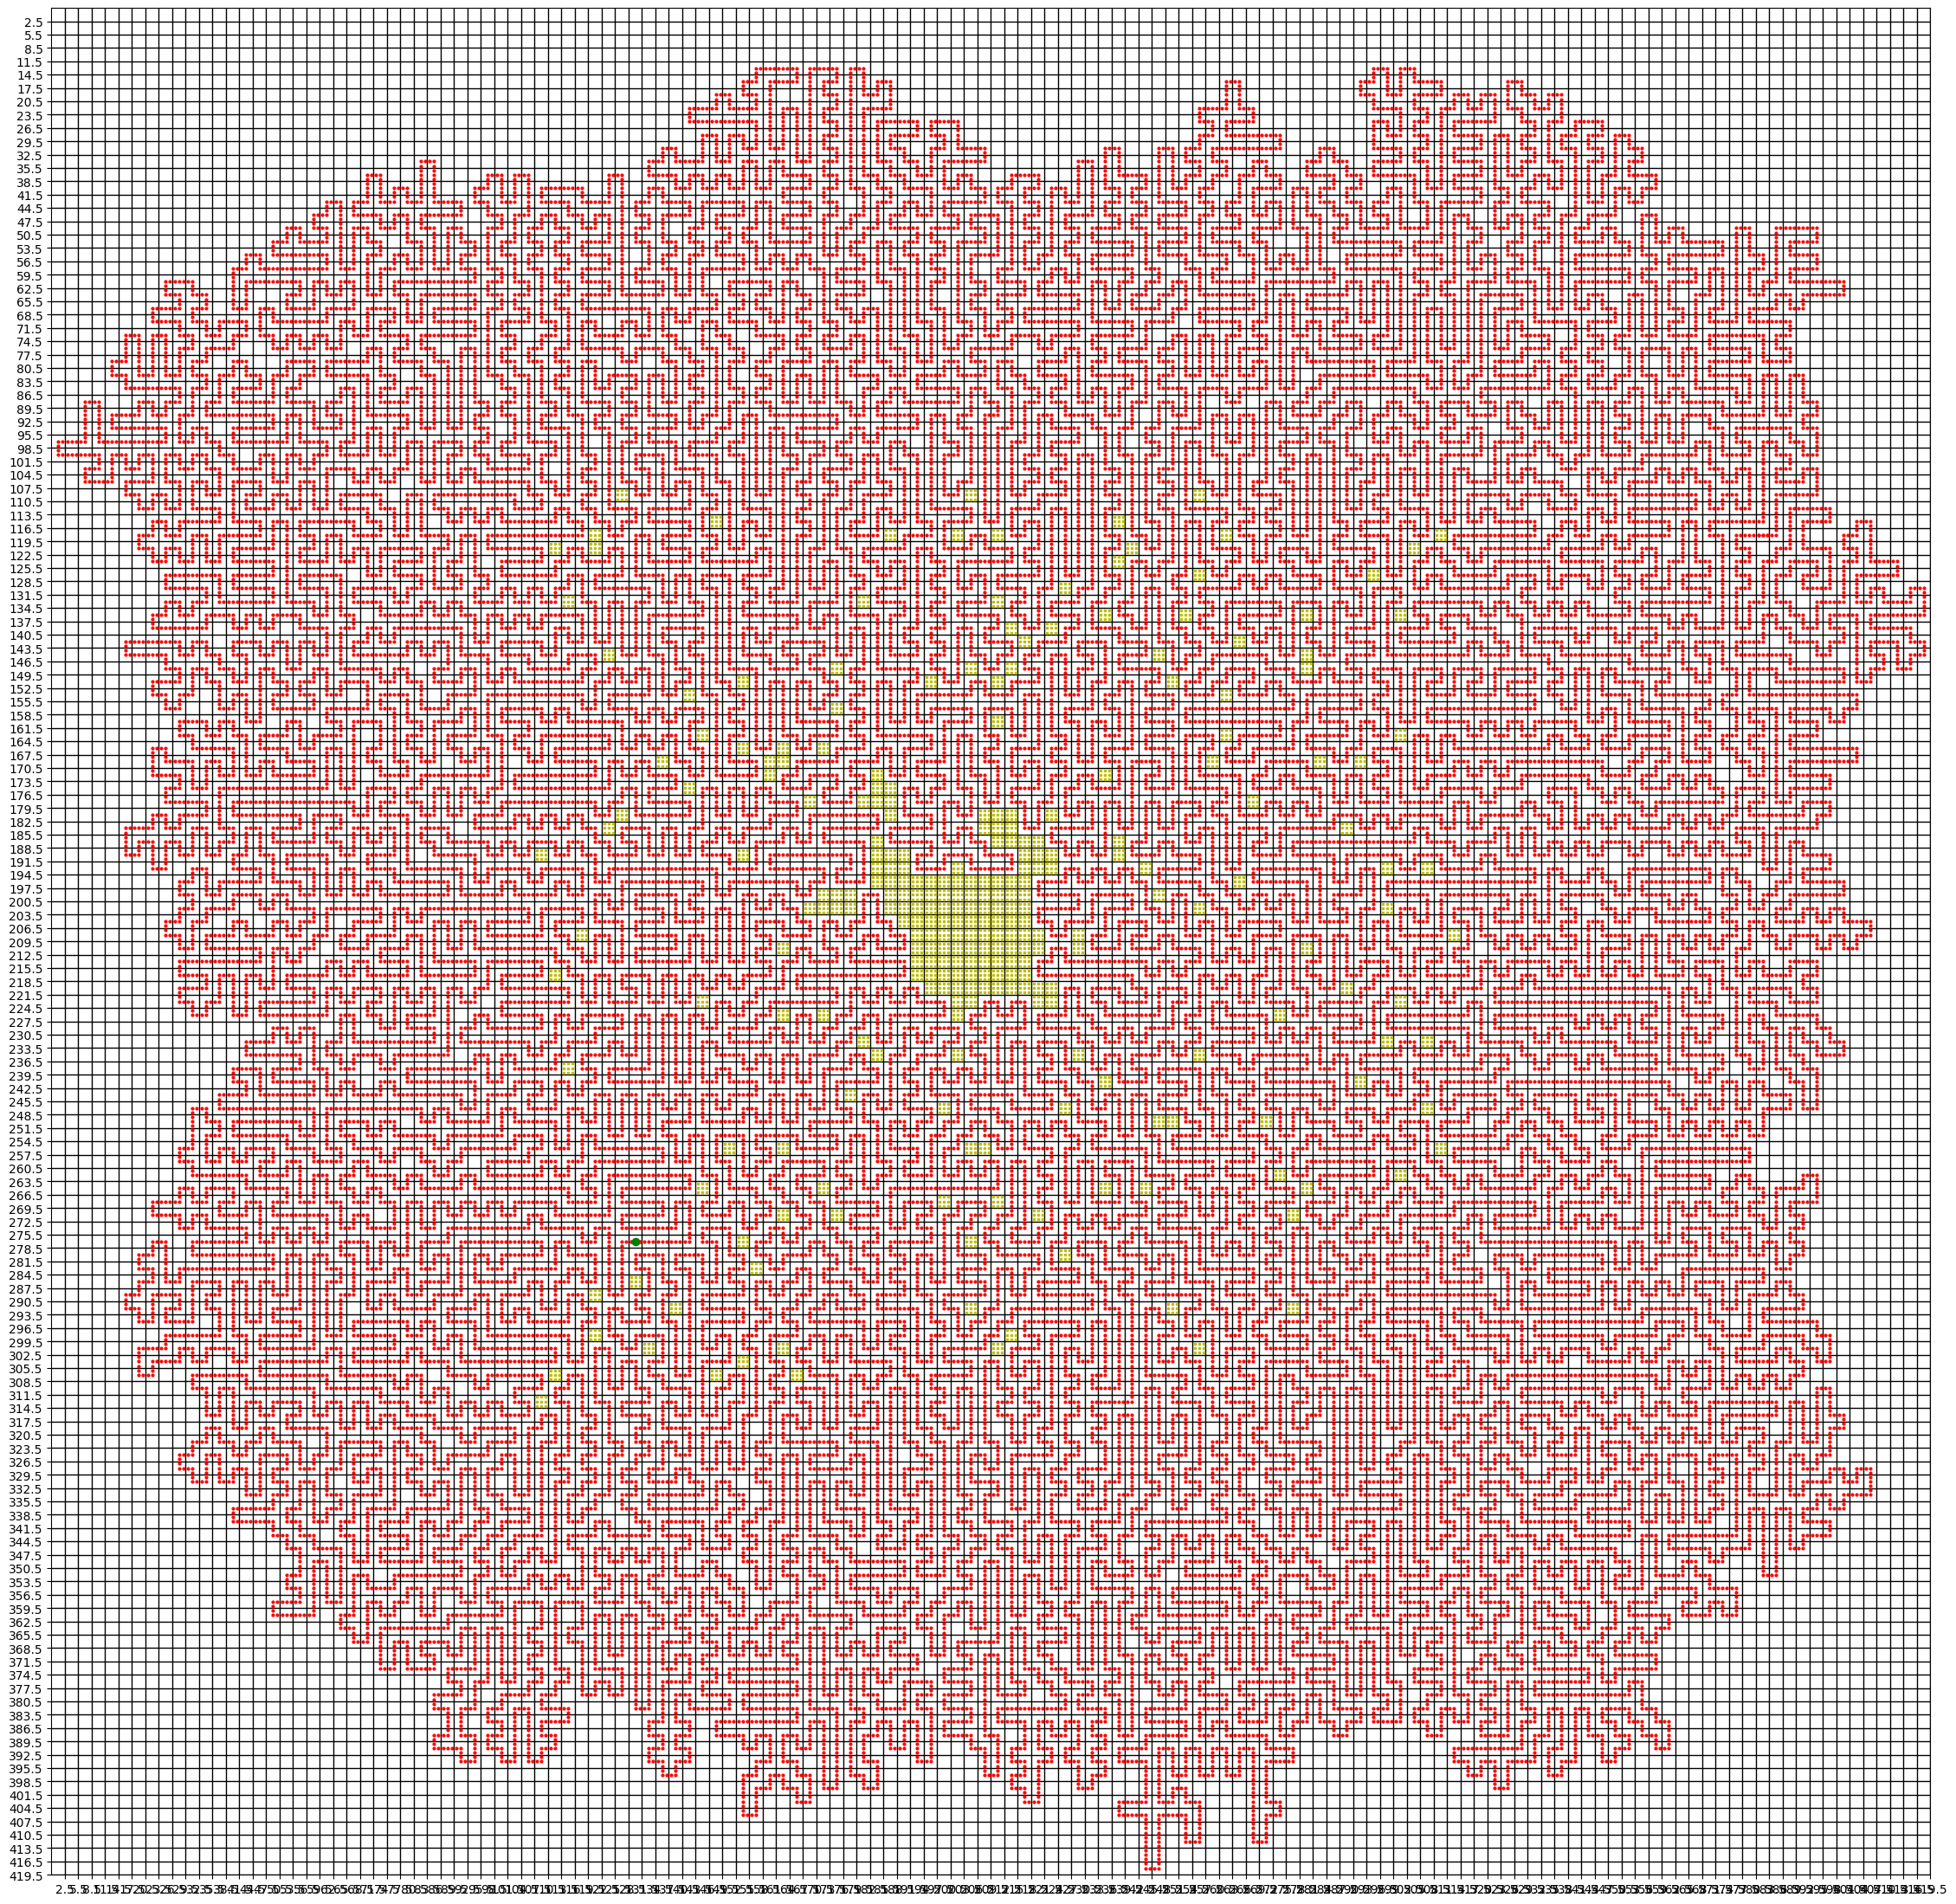

In [5]:
import matplotlib.pyplot as plt
from itertools import product

plt.figure(figsize=(SHAPE[0]*0.2, SHAPE[1]*0.2))
plt.xticks([])
plt.yticks([])

# plt.gca().set_xticks([i + 0.5 for i in range(0, SHAPE[0]*3 + 1)], minor=True)
plt.gca().set_xticks([i + 0.5 for i in range(2, SHAPE[0]*3, 3)])
# plt.gca().set_yticks([i + 0.5 for i in range(0, SHAPE[1]*3 + 1)], minor=True)
plt.gca().set_yticks([i + 0.5 for i in range(2, SHAPE[0]*3, 3)])
plt.grid(True, which='minor', linestyle='-', linewidth=0.5)
plt.grid(True, which='major', linestyle='-', linewidth=1, color='black')

plt.plot(pipe['x'], pipe['y'], 'ro', markersize=2)
# outside = np.where(grid == 1)
# plt.plot(outside[1], outside[0], 'ko', markersize=1)
# inside = np.where(grid == 0)
# plt.plot(inside[1], inside[0], 'co', markersize=1)
plt.plot(inside_squares['x'], inside_squares['y'], 'ys', markersize=2)

# for x, y in product(range(SHAPE[0]), range(SHAPE[1])):
#     plt.text(1 + x*3, 1 + y*3, str(x + y * SHAPE[0]), color='gray', ha='center', va='center', alpha=0.3, fontsize=7)
plt.plot(1 + start.x*3, 1 + start.y*3, 'go')
plt.xlim(-0.5, SHAPE[0]*3 - 0.5)
plt.ylim(SHAPE[1]*3 - 0.5, -0.5)
plt.show()